# 第二章 神经网络深⼊
# 第2节【实战】拟合问题
%matplotlib inline

In [13]:
import numpy as np
import torch
from torch import nn

from ..util.utils import plot_points

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [14]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [15]:
class LineModel(nn.Module):
    def __init__(self) -> None:
        super(LineModel, self).__init__()
        self.ll = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.ll(x)


# model = nn.Linear(in_features=1, out_features=1)
model = LineModel()
loss_fn = nn.MSELoss()  # 最小二乘
optimizer = torch.optim.SGD(model.parameters(), lr=.01)


def train(model: nn.Module, loss, optimizer):
    model.train()

In [16]:
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)
# inputs, targets

In [17]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    loss.backward()

    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, epochs, loss.item()))

Epoch [100/1000], Loss: 0.2005
Epoch [200/1000], Loss: 0.1878
Epoch [300/1000], Loss: 0.1802
Epoch [400/1000], Loss: 0.1757
Epoch [500/1000], Loss: 0.1730
Epoch [600/1000], Loss: 0.1713
Epoch [700/1000], Loss: 0.1704
Epoch [800/1000], Loss: 0.1698
Epoch [900/1000], Loss: 0.1694
Epoch [1000/1000], Loss: 0.1692


In [18]:
model.state_dict()
# torch.save(m odel.state_dict(), "model.pth")
# model.load_state_dict(torch.load("model.pth"))

OrderedDict([('ll.weight', tensor([[0.2669]])), ('ll.bias', tensor([0.6992]))])

[Parameter containing:
 tensor([[0.2669]], requires_grad=True),
 Parameter containing:
 tensor([0.6992], requires_grad=True)]

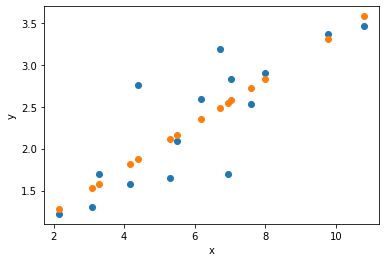

In [19]:
plot_points(x_train, y_train, 'test')
y2 = model(torch.from_numpy(x_train)).detach().numpy()
plot_points(x_train, y2, 'test')
# plot_line(model.parameters(), 'test')
list(model.parameters())